### Text Summarization

Data Source --> LLM --> Summary of data

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

![alt text](download.png)

In [9]:
from langchain_groq import ChatGroq
api_key = os.getenv('GROQ_API_KEY')

# llm
llm = ChatGroq(groq_api_key = api_key, model= "llama-3.1-8b-instant")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000012CC56FCA50>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000012CC56FD450>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [3]:
from langchain.schema import AIMessage, HumanMessage, SystemMessage

In [4]:
speech="""
People across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.

In our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds of the government offices for this purpose. The government should reach him. Since you have assigned this responsibility to me, about four crore families have got their ‘pucca’ houses. However, I have encountered cases where someone is left out of the government benefits. Therefore, I have decided to tour the country again, to listen to people’s experiences with government schemes, to understand whether they received the intended benefits, and to ensure that the programs are reaching everyone as planned without paying any bribes. We will get the real picture if we visit them again. Therefore, this ‘Viksit Bharat Sankalp Yatra’ is, in a way, my own examination. I want to hear from you and the people across the country whether what I envisioned and the work I have been doing aligns with reality and whether it has reached those for whom it was meant.

It is crucial to check whether the work that was supposed to happen has indeed taken place. I recently met some individuals who utilized the Ayushman card to get treatment for serious illnesses. One person met with a severe accident, and after using the card, he could afford the necessary operation, and now he is recovering well. When I asked him, he said: “How could I afford this treatment? Now that there is the Ayushman card, I mustered courage and underwent an operation. Now I am perfectly fine.”  Such stories are blessings to me.

The bureaucrats, who prepare good schemes, expedite the paperwork and even allocate funds, also feel satisfied that 50 or 100 people who were supposed to get the funds have got it. The funds meant for a thousand villages have been released. But their job satisfaction peaks when they hear that their work has directly impacted someone’s life positively. When they see the tangible results of their efforts, their enthusiasm multiplies. They feel satisfied. Therefore, ‘Viksit Bharat Sankalp Yatra’ has had a positive impact on government officers. It has made them more enthusiastic about their work, especially when they witness the tangible benefits reaching the people. Officers now feel satisfied with their work, saying, “I made a good plan, I created a file, and the intended beneficiaries received the benefits.” When they find that the money has reached a poor widow under the Jeevan Jyoti scheme and it was a great help to her during her crisis, they realise that they have done a good job. When a government officer listens to such stories, he feels very satisfied.

There are very few who understand the power and impact of the ‘Viksit Bharat Sankalp Yatra’. When I hear people connected to bureaucratic circles talking about it, expressing their satisfaction, it resonates with me. I’ve heard stories where someone suddenly received 2 lakh rupees after the death of her husband, and a sister mentioned how the arrival of gas in her home transformed her lives. The most significant aspect is when someone says that the line between rich and poor has vanished. While the slogan ‘Garibi Hatao’ (Remove Poverty) is one thing, but the real change happens when a person says, “As soon as the gas stove came to my house, the distinction between poverty and affluence disappeared.
"""

In [5]:
speech

'\nPeople across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.\n\nIn our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds of the gove

In [6]:
llm.get_num_tokens(speech)

c:\Users\KG5563\OneDrive - MillerKnoll\MyFiles\Generative AI\clean_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


909

In [7]:
chat_message=[
    SystemMessage(content="You are expert with expertise in summarizing speeches"),
    HumanMessage(content=f"Please provide a short and concisse summary of the follow speech:\n Text:{speech}")
]

In [10]:
# Getting the summary of small contents
llm(chat_message)

AIMessage(content="Here is a concise summary of the speech:\n\nThe speaker, a Member of Parliament, is participating in the 'Viksit Bharat Sankalp Yatra' (Developed India Resolution Journey) to ensure government schemes reach their intended beneficiaries without issues. The initiative aims to provide a firsthand account of the impact of these schemes and identify areas for improvement. The speaker has observed that while bureaucrats are satisfied with the number of people who benefit from schemes, it's the personal stories of transformation that truly make a difference. By witnessing the tangible benefits of their work, government officers feel more enthusiastic and satisfied with their role. The speaker shares inspiring stories of people whose lives have been positively impacted by government schemes, emphasizing the power of the 'Viksit Bharat Sankalp Yatra' in creating a more equitable society.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 167, 'pro

### Prompt Template Text Summarization

In [12]:
from langchain.chains import LLMChain
from langchain_core.prompts import PromptTemplate

generic_template = """
Write a summary of the following speech:
Speech:{speech}
Translate the precise summary to {language}
"""

prompt = PromptTemplate(
    input_variables=['speech','language'],
    template=generic_template
)
prompt

PromptTemplate(input_variables=['language', 'speech'], input_types={}, partial_variables={}, template='\nWrite a summary of the following speech:\nSpeech:{speech}\nTranslate the precise summary to {language}\n')

In [13]:
complete_prompt=prompt.format(speech=speech, language="Tamil")
complete_prompt

'\nWrite a summary of the following speech:\nSpeech:\nPeople across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.\n\nIn our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses

In [ ]:
llm.get_num_tokens(complete_prompt) # prompt tokens are added to speech tokens (909) -- > (931)

931

In [19]:
llm_chain = LLMChain(llm=llm, prompt=prompt)
summary = llm_chain.run({'speech':speech,'language':'hindi'})
summary

'Aapke desh mein, sarkari, rajneeti, aur samajik prashasan mein shamil log, Viksit Bharat Sankalp Yatra (viksit Bharat nirnay yatra) ko safal banane ke liye apne samay ki dedication kar rahe hain. Isliye, maine yah faisla kiya ki main bhi is karyakram mein aapke seva mein aadheen ho kar ismein shamil hoon.\n\nHamare desh mein, sarkarayein aane-jane wali hain, bahut se yojna banai jaati hain, charchayein hoti hain, aur bade-bade vada kiye jaate hain. Lekin, mere anubhav aur dhangon se is baare mein socha gaya ki sabse mahatvapoorn cheez jo samne aayi hai, wo hai ki sarkar ke plans ke labh pahunchne mein koi mushkila na ho.\n\nAgar Pradhan Mantri Awas Yojna aapke liye hai, toh aapko apna ghar milti chahiye. Aapko sarkari karyalayon ke ghoomne ki aavashyakata nahin hai. Sarkar aapko pahunchni chahiye. Maine is jati ki jati hai ki aapne 4 crore parivaaron ko apna pucca ghar mil gaya hai. Lekin, mere anubhav se pata chala hai ki kuchh logon ko sarkari labh se binaa koi mushkila na ho.\n\nIs

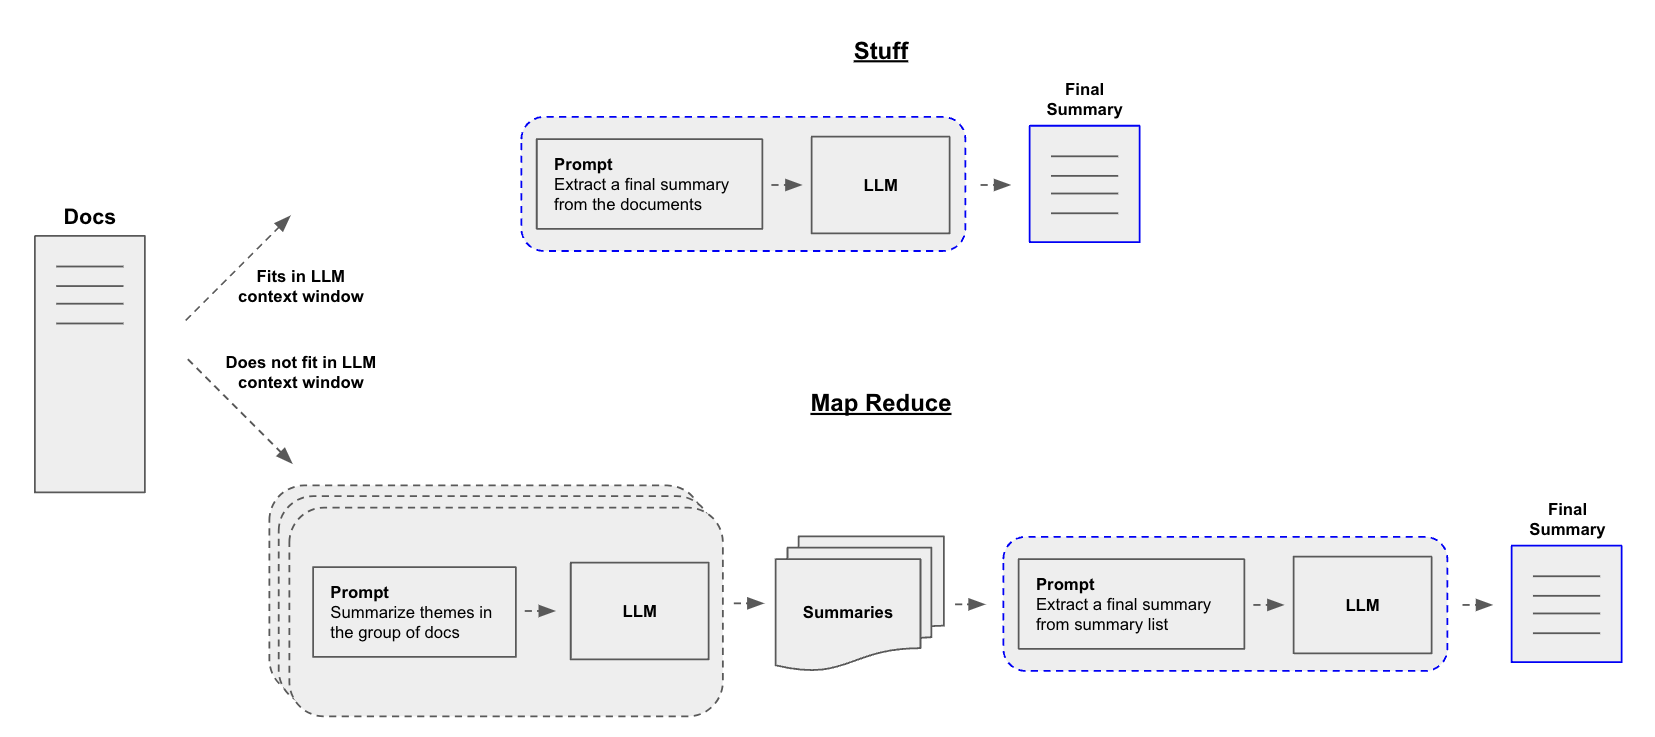

### 1. Stuff Document Chain Text Summarization

In [20]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("apjspeech.pdf")
docs = loader.load_and_split()
docs

[Document(metadata={'producer': 'GPL Ghostscript 8.15', 'creator': 'PScript5.dll Version 5.2', 'creationdate': 'D:20070730160943', 'moddate': 'D:20070730160943', 'title': 'Microsoft Word - Document1', 'author': 'Shri', 'source': 'apjspeech.pdf', 'total_pages': 7, 'page': 0, 'page_label': '1'}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealt

In [21]:
template = """Write a concise and short summary of the following speech, Speech:{text}"""

prompt = PromptTemplate(input_variables=['text'], template=template)

In [22]:
from langchain.chains.summarize import load_summarize_chain

In [23]:
chain = load_summarize_chain(llm, chain_type='stuff', prompt=prompt, verbose= True)
output_summary = chain.run(docs)
output_summary



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise and short summary of the following speech, Speech:A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online inte

'Here\'s a concise and short summary of A.P.J. Abdul Kalam\'s Departing Speech as the President of India:\n\nIn his speech, Kalam reflects on his five-year tenure as President and expresses gratitude to the nation for the opportunity to serve. He highlights 10 key messages that will guide India\'s development, including accelerating development, empowering villages, and mobilizing rural core competence for competitiveness. He emphasizes the importance of youth, innovation, and partnership in overcoming challenges and achieving a developed India.\n\nKalam shares various examples and experiences from his tenure, including interactions with rural villagers, farmers, and youth, showcasing their resilience and determination. He highlights initiatives such as the Pan African e-Network, PURA (Providing Urban Amenities in Rural Areas), and the Lead India 2020 movement, which aim to empower rural communities and transform the nation.\n\nIn conclusion, Kalam reiterates his mission to bring conne

### 2. Map Reduce Summarization

In [27]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [31]:
docs

[Document(metadata={'producer': 'GPL Ghostscript 8.15', 'creator': 'PScript5.dll Version 5.2', 'creationdate': 'D:20070730160943', 'moddate': 'D:20070730160943', 'title': 'Microsoft Word - Document1', 'author': 'Shri', 'source': 'apjspeech.pdf', 'total_pages': 7, 'page': 0, 'page_label': '1'}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealt

In [30]:
final_documents = RecursiveCharacterTextSplitter(chunk_size = 2000, chunk_overlap = 200).split_documents(docs)
final_documents

[Document(metadata={'producer': 'GPL Ghostscript 8.15', 'creator': 'PScript5.dll Version 5.2', 'creationdate': 'D:20070730160943', 'moddate': 'D:20070730160943', 'title': 'Microsoft Word - Document1', 'author': 'Shri', 'source': 'apjspeech.pdf', 'total_pages': 7, 'page': 0, 'page_label': '1'}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealt

In [32]:
len(final_documents)

13

In [33]:
chunk_prompt = """
Please summarize the below speec:
Speech:'{text}'
Summary:
"""

map_prompt_template = PromptTemplate(input_variables=['text'], template=chunk_prompt)


In [34]:
final_prompt='''
Provide the final summary of the entire speech with these important points.
Add a Motivation Title,Start the precise summary with an introduction and provide the summary in number 
points for the speech.
Speech:{text}

'''
final_prompt_template=PromptTemplate(input_variables=['text'],template=final_prompt)
final_prompt_template

PromptTemplate(input_variables=['text'], input_types={}, partial_variables={}, template='\nProvide the final summary of the entire speech with these important points.\nAdd a Motivation Title,Start the precise summary with an introduction and provide the summary in number \npoints for the speech.\nSpeech:{text}\n\n')

In [35]:
summary_chain = load_summarize_chain(
    llm= llm,
    chain_type="map_reduce",
    map_prompt = map_prompt_template,
    combine_prompt= final_prompt_template,
    verbose= True
)

In [36]:
summary = summary_chain.run(final_documents)
summary



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

Please summarize the below speec:
Speech:'A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have ma

Token indices sequence length is longer than the specified maximum sequence length for this model (2523 > 1024). Running this sequence through the model will result in indexing errors



> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Provide the final summary of the entire speech with these important points.
Add a Motivation Title,Start the precise summary with an introduction and provide the summary in number 
points for the speech.
Speech:In his departing speech, former Indian President A.P.J. Abdul Kalam reflected on his five-year tenure and expressed gratitude to the people of India. He highlighted 10 key messages that have guided his interactions with various groups of people during his presidency.

The 10 messages are:

1. Accelerate development, focusing on the aspirations of the youth.
2. Empower villages.
3. Mobilize rural core competence for competitiveness.
4. Focus on agricultural growth, from seed to food production.
5. Overcome problems through determination and success.
6. Overcome problems through partnership and collaboration.
7. Show courage and resilience in combating natural calamities.
8. Foster connectivity for soc

'**"Unleashing India\'s Potential: A Call to Action"**\n\n**Introduction:**\nIn his farewell speech, former Indian President A.P.J. Abdul Kalam reflected on his five-year tenure, emphasizing the importance of empowering India\'s youth and villages to drive the country\'s development. He shared key messages and personal anecdotes to inspire the nation towards a brighter future.\n\n**Summary of Key Points:**\n\n1. **Empowerment of Youth and Villages**: Focus on the aspirations of the youth and empower villages to deal with their development and connect them with urban societies.\n2. **Accelerated Development**: Accelerate development, focusing on the aspirations of the youth, and empower villages to drive growth and prosperity.\n3. **Connectivity**: Foster connectivity for societal transformation, including physical, electronic, and knowledge connectivity.\n4. **Agricultural Growth**: Focus on agricultural growth, from seed to food production, to double agricultural production with reduc

### 3.Refine Chain Summarization

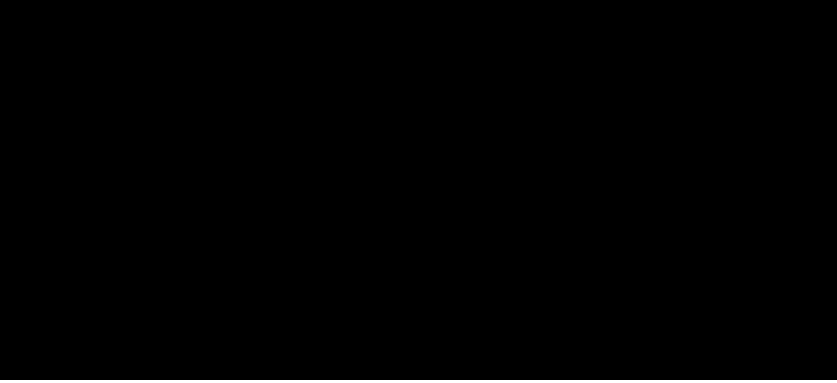

In [37]:
chain=load_summarize_chain(
    llm=llm,
    chain_type="refine",
    verbose=True
)
output_summary=chain.run(final_documents)
output_summary



> Entering new RefineDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have man

'Refined Summary:\n\nA.P.J. Abdul Kalam\'s departing speech as the President of India emphasized the importance of key messages learned during his five-year tenure, focusing on the empowerment of Indian society. The President highlighted the need to:\n\n1. Accelerate development with youth aspirations, emphasizing the potential of the 540 million youth below the age of 25 to drive development and growth. He was inspired by a child\'s question, "why India cannot become a developed nation before the year 2020," reflecting the growing desire among the youth to live in a developed India.\n\n2. Empower villages, as exemplified by the PURA initiative, which has successfully connected 65 villages with a population of 3 lakhs, providing them with physical, electronic, and knowledge connectivities. This vision is crucial for transforming India\'s 600,000 villages into self-sufficient communities.\n\n3. Leverage rural core competencies for competitiveness, highlighting the initiative of Periyar 

In [1]:
from langchain_yt_dlp.youtube_loader import YoutubeLoaderDL

loader = YoutubeLoaderDL.from_youtube_url(
    "https://www.youtube.com/watch?v=FwOTs4UxQS4",  # your video URL
    add_video_info=True
)
docs = loader.load()


In [2]:
docs

[Document(metadata={'source': 'FwOTs4UxQS4', 'title': 'AI Agents, Clearly Explained', 'description': "My AI Toolkit: https://academy.jeffsu.org/ai-toolkit?utm_source=youtube&utm_medium=video&utm_campaign=177\n\nUnderstanding AI Agents doesn't require a technical background. This video breaks down the evolution from basic LLMs like #ChatGPT to AI Workflows and finally to true #AI Agents through practical, real-world examples.\n\nLearn the key differences between these technologies and discover how concepts like RAG and ReAct actually work in simple terms. Perfect for regular AI users who want to understand how these emerging technologies will impact their daily lives.\n\n*TIMESTAMPS*\n00:00 AI vs. AI Agents\n01:04 Level 1: LLMs\n02:17 Level 2: AI Workflows\n05:26 Level 3: AI Agents\n07:48 Real-world Example\n09:10 Summary\n\n*RESOURCES MENTIONED*\nHelena Liu's AI Workflow Tutorial: https://youtu.be/H0YRniHh2tg\nAndrew Ng's AI Agent Demo: https://youtu.be/KrRD7r7y7NY\n\n*BE MY FRIEND:*\n

In [4]:
import os
from dotenv import load_dotenv
# from langchain_community.document_loaders import YoutubeLoader
from langchain_yt_dlp.youtube_loader import YoutubeLoaderDL
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains.summarize import load_summarize_chain
from langchain.prompts import PromptTemplate
from langchain_groq import ChatGroq

# Load environment variables
load_dotenv()
GROQ_API_KEY = os.getenv("GROQ_API_KEY")

if not GROQ_API_KEY:
    raise ValueError("Please set your GROQ_API_KEY in the .env file.")

# Function to summarize a YouTube video
def summarize_youtube_video(youtube_url: str):
    # 1. Load YouTube Transcript
    loader = YoutubeLoaderDL.from_youtube_url(youtube_url, add_video_info=True)
    docs = loader.load()

    # 2. Split text for summarization
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=200)
    split_docs = text_splitter.split_documents(docs)

    # 3. Initialize Groq LLM
    llm = ChatGroq(model="llama3-8b-8192", temperature=0)

    # 4. Create a summarization chain
    prompt_template = """
    Write a concise and clear summary of the following text:
    {text}
    """
    prompt = PromptTemplate(template=prompt_template, input_variables=["text"])
    chain = load_summarize_chain(llm, chain_type="map_reduce", map_prompt=prompt, combine_prompt=prompt)

    # 5. Run summarization
    summary = chain.run(split_docs)
    return summary


if __name__ == "__main__":
    youtube_url = "https://www.youtube.com/watch?v=FwOTs4UxQS4" # Replace with your video URL
    result = summarize_youtube_video(youtube_url)
    print("\n=== VIDEO SUMMARY ===\n")
    print(result)



=== VIDEO SUMMARY ===

I apologize, but there is no text provided for me to summarize. Please provide the text you would like me to summarize, and I'll be happy to assist you!


In [8]:

from langchain.document_loaders import YoutubeLoader
from langchain_yt_dlp import YoutubeLoaderDL

# Provide the YouTube video URL
youtube_url = "https://www.youtube.com/watch?v=FwOTs4UxQS4"

# Load the transcript
loader = YoutubeLoaderDL.from_youtube_url(youtube_url)
documents = loader.load()

# Print the transcript
for doc in documents:
    print(doc.page_content)
print(documents)
# Key Points:

# Replace "YOUR_VIDEO_ID" with the actual YouTube video ID or URL.
# The documents object contains chunks of the transcript, and you can access the text via the page_content attribute.

# This method splits the transcript into manageable chunks, making it easier to process or analyze further. Let me know if you need help with anything else! 😊


 
[Document(metadata={'source': 'FwOTs4UxQS4'}, page_content=' ')]


In [1]:
import streamlit as st
from pytube import YouTube
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import YoutubeLoader
from langchain.chains.summarize import load_summarize_chain
from langchain_groq import ChatGroq
from langchain_core.prompts import PromptTemplate
import os
from dotenv import load_dotenv
 
# Load environment variables
load_dotenv()
 
# Set up the language model with API key
os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')
llm = ChatGroq(model='llama-3.1-70b-versatile')
 
# List of top 10 most spoken languages
top_languages = [
    ("English", "en"),
    ("Mandarin Chinese", "zh"),
    ("Hindi", "hi"),
    ("Spanish", "es"),
    ("French", "fr"),
    ("Standard Arabic", "ar"),
    ("Bengali", "bn"),
    ("Portuguese", "pt"),
    ("Russian", "ru"),
    ("Japanese", "ja"),
]
 
# Main function for YouTube summarizer
def youtube_summarizer():
    st.title("YouTube Video Summarizer")
 
    # Input YouTube URL
    youtube_url = st.text_input("Enter YouTube URL:")
 
    # Dropdown for language selection
    language = st.selectbox(
        "Select the language for summarization:",
        [lang_name for lang_name, _ in top_languages]
    )
 
    # Map the selected language name to its code
    language_code = dict(top_languages)[language]
 
    # Button to generate summary
    if st.button("Generate Summary"):
        if youtube_url:
            with st.spinner("Loading transcript, fetching thumbnail, and generating summary..."):
                try:
                    # Get video details using PyTube
                    yt = YouTube(youtube_url)
                    video_title = yt.title
                    thumbnail_url = yt.thumbnail_url
 
                    # Display video title
                    st.subheader(video_title)
 
                    # Load Transcript in the selected language
                    loader = YoutubeLoader.from_youtube_url(youtube_url, language=["hi", "en", "en-US"])
                    transcript = loader.load()
 
                    # Check if transcript is available
                    if not transcript:
                        st.warning("No transcript available in the selected language.")
                        return
 
                    # Split Transcript into chunks
                    text_splitter = RecursiveCharacterTextSplitter(chunk_size=100000, chunk_overlap=10000, add_start_index=True)
                    chunks = text_splitter.split_documents(transcript)
 
                    # Prepare prompts
                    chunk_prompt = "Break down the following text into key points and highlight the most critical information for each section: Text: '{text}' Key Points:"
 
 
                    map_prompt_template = PromptTemplate(input_variables=['text'], template=chunk_prompt)
                    
                    final_prompt = '''
Provide a comprehensive summary of the key points in the specified language ({language}). First, list the key points as a breakdown, then synthesize these points into a clear and concise summary. TEXT: {text}
'''
 
 
                    final_prompt_template = PromptTemplate(input_variables=['text', 'language'], template=final_prompt)
 
                    # Load summarization chain
                    chain = load_summarize_chain(
                        llm=llm,
                        chain_type='map_reduce',
                        map_prompt=map_prompt_template,
                        combine_prompt=final_prompt_template,
                        verbose=True
                    )
                  
                    
 
                    # Display video thumbnail
                    st.image(thumbnail_url, use_column_width=True)
 
                    # Generate and display the full summary
                    summary = chain.run({"input_documents": chunks, "language": language})
                    st.subheader(f"Summary (in {language}):")
                    st.success(summary)
 
                except Exception as e:
                    st.error(f"An error occurred: {e}")
        else:
            st.warning("Please enter a valid YouTube URL.")
 
if __name__ == "__main__":
    youtube_summarizer()

2025-08-15 21:55:07.382 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 21:55:07.737 
  command:

    streamlit run c:\Users\KG5563\OneDrive - MillerKnoll\MyFiles\Generative AI\clean_env\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-15 21:55:07.738 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 21:55:07.738 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 21:55:07.738 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 21:55:07.739 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 21:55:07.739 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2